In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [88]:
data = pd.read_csv('Data_for_UCI_named.csv', delimiter=',')
data.shape
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [89]:
X = data.drop(['stab', 'stabf'], axis =1)
Y = data [['stabf']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8)

In [90]:
from sklearn import tree
clf = tree.DecisionTreeClassifier() # alpha=0 means no laplace smoothing
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

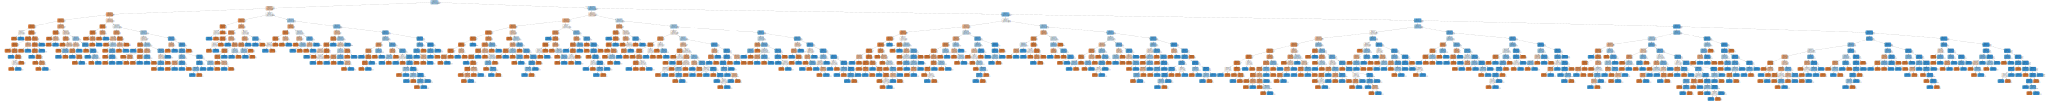

In [91]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(clf, out_file=None,  
                         class_names=np.array(["stable","unstable"]),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [92]:
print(clf.predict(X_test))
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
acc = accuracy_score(y_test,pred)
print(acc)

['stable' 'unstable' 'unstable' ... 'unstable' 'stable' 'unstable']
0.8645


In [93]:
from sklearn.metrics import classification_report
class_names=np.array(["stable","unstable"])
print(classification_report(y_test, pred, target_names=class_names))

              precision    recall  f1-score   support

      stable       0.81      0.82      0.82       729
    unstable       0.90      0.89      0.89      1271

   micro avg       0.86      0.86      0.86      2000
   macro avg       0.85      0.86      0.85      2000
weighted avg       0.86      0.86      0.86      2000



In [94]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train, np.ravel(y_train))

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [95]:
print(logreg.predict(X_test))
pred = logreg.predict(X_test)
acc = accuracy_score(y_test,pred)
print(acc)

['stable' 'unstable' 'unstable' ... 'stable' 'stable' 'stable']
0.834


In [96]:
from sklearn.metrics import classification_report
class_names=np.array(["stable","unstable"])
print(classification_report(y_test, pred, target_names=class_names))

              precision    recall  f1-score   support

      stable       0.80      0.73      0.76       729
    unstable       0.85      0.89      0.87      1271

   micro avg       0.83      0.83      0.83      2000
   macro avg       0.82      0.81      0.82      2000
weighted avg       0.83      0.83      0.83      2000



In [98]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(X_train, np.ravel(y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [99]:
pred = clf.predict(X_test)
acc = accuracy_score(y_test,pred)
print(acc)

0.9195


In [100]:
from sklearn.metrics import classification_report
class_names=np.array(["stable","unstable"])
print(classification_report(y_test, pred, target_names=class_names))

              precision    recall  f1-score   support

      stable       0.92      0.85      0.89       729
    unstable       0.92      0.96      0.94      1271

   micro avg       0.92      0.92      0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000

